In [ ]:
##########################  이진영상처리  #################################

# 영상의 이진화(Binarization)란? 
# • 영상의픽셀값을0 또는255(1)로만드는연산 
# ▪ 배경(background) vs. 객체(object) 
# ▪ 관심 영역 vs. 비관심 영역

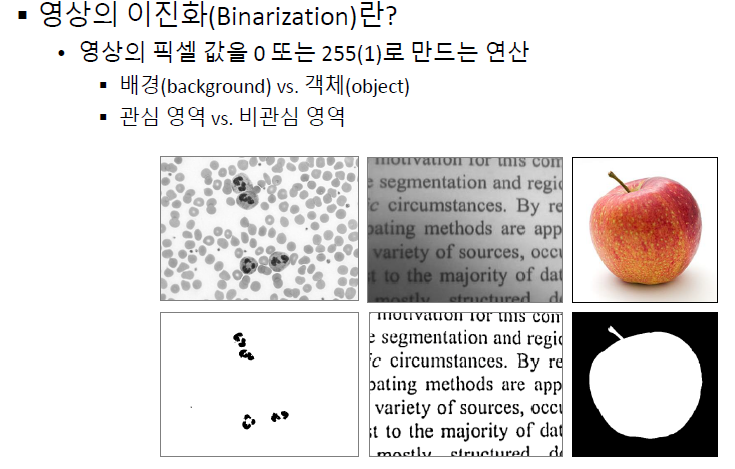

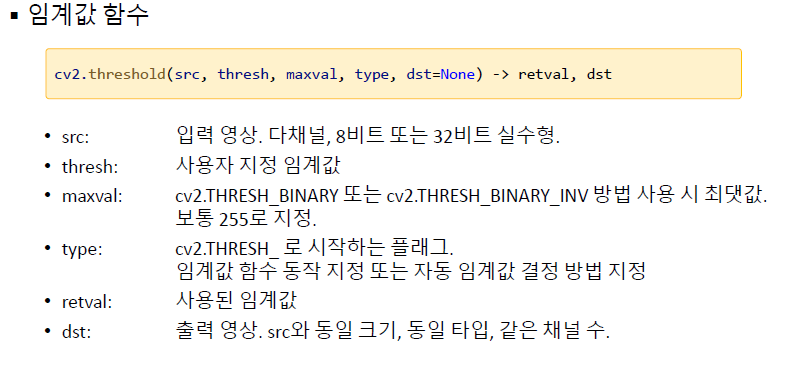

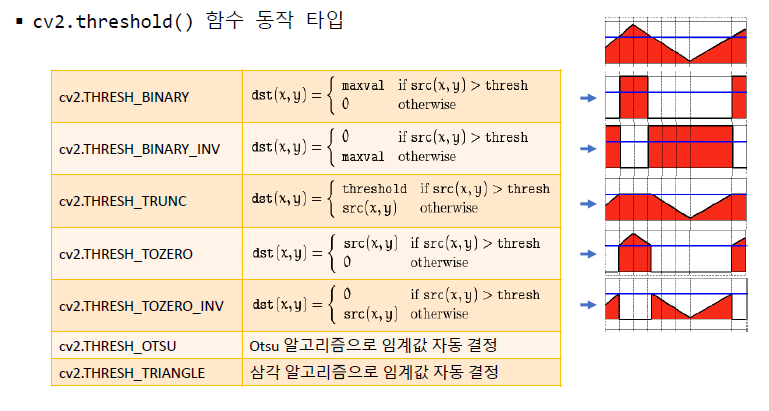

In [8]:
import sys
import numpy as np
import cv2


src = cv2.imread('cells.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

_, dst1 = cv2.threshold(src, 100, 255, cv2.THRESH_BINARY)
_, dst2 = cv2.threshold(src, 210, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
## 트랙바 활용 코드

import sys
import numpy as np
import cv2


src = cv2.imread('cells.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()


def on_threshold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Threshold', 'dst', 0, 255, on_threshold)
cv2.setTrackbarPos('Threshold', 'dst', 128)

cv2.waitKey()
cv2.destroyAllWindows()

128
179
128
127
126
125
124
123
122
121
120
118
117
116
114
112
111
110
109
108
107
106
104
102
100
98
96
93
91
90
89
88
87
86
84
83
82
81
79
78
76
74
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
60
64
70
75
80
86
90
93
95
96
97
98
99
100
102
104
106
108
110
113
115
117
119
120
124
127
129
133
137
143
149
155
160
166
172
177
183
187
192
196
200
204
208
211
214
216
219
220
222
223
224
226
228
230
232
233
234
236
238
239
240
241
242
243


# OTSU 이진화

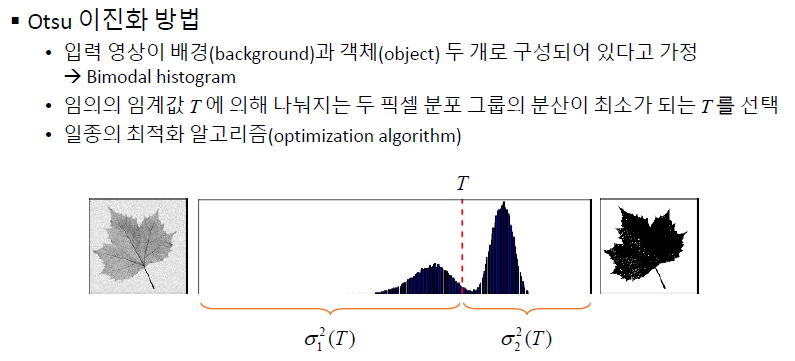

OTSU 이진화 방법의 핵심 : 군내 분산이 최소이면서, 군간 분산이 최대인 지점 찾기
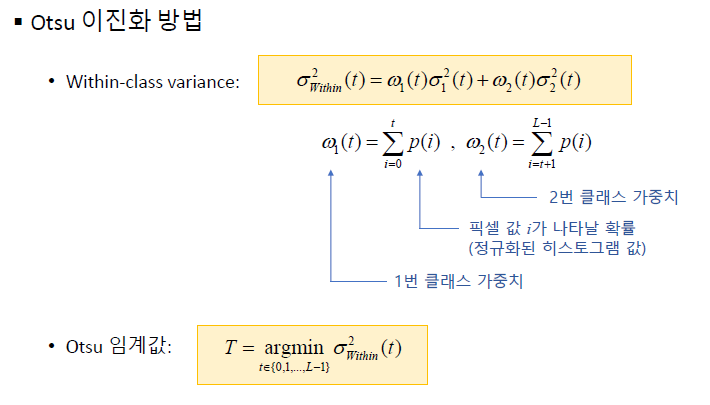



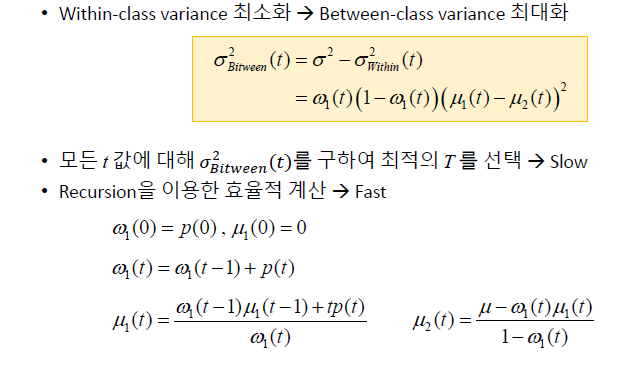

otsu's threshold: 170.0


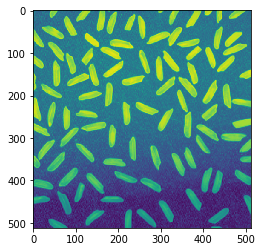

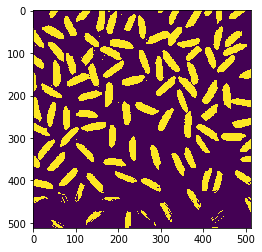

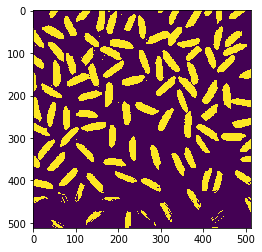

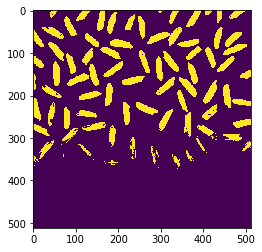

In [17]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt


src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

th, dst = cv2.threshold(src, 0, 255,cv2.THRESH_OTSU)
th, dst2 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
th, dst3 = cv2.threshold(src, 170, 255, cv2.THRESH_BINARY)
print("otsu's threshold:", th)  # 131

plt.imshow(src)
plt.show()
plt.imshow( dst)
plt.show()
plt.imshow( dst2)
plt.show()
plt.imshow( dst3)
plt.show()

# 지역 이진화

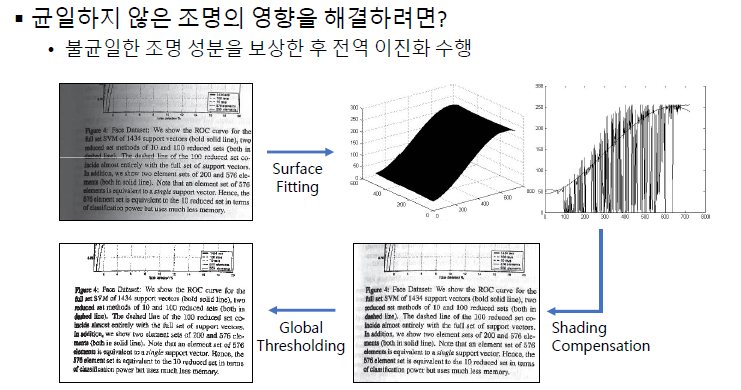

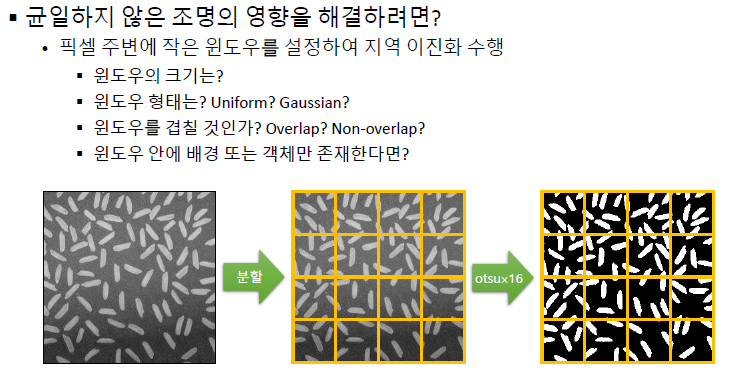

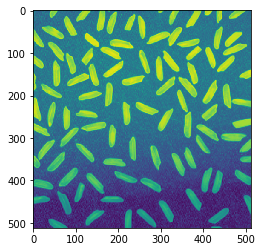

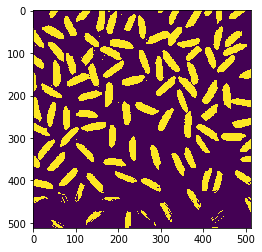

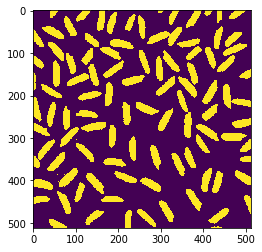

In [2]:
### 지역 이진화 해보기 (구역 나누기)

import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt


# 입력 영상 불러오기
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

# 전역 이진화 by Otsu's method
_, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 지역 이진화 by Otsu's method
dst2 = np.zeros(src.shape, np.uint8)

bw = src.shape[1] // 4
bh = src.shape[0] // 4

for y in range(4):
    for x in range(4):
        src_ = src[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        dst_ = dst2[y*bh:(y+1)*bh, x*bw:(x+1)*bw]
        cv2.threshold(src_, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU, dst_)

# 결과 출력
plt.imshow(src)
plt.show()
plt.imshow(dst1)
plt.show()
plt.imshow(dst2)
plt.show()

# Adaptive 이진화 : 블록사이즈마다 다른 임계값을 적용하는 방식
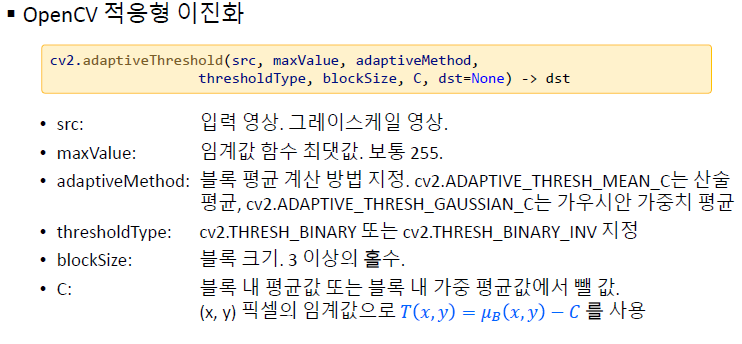

Method
1. cv2.ADAPTIVE_THRESH_MEAN_C  : blockSize 영역의 모든 픽셀에 평균값을 구하여 적용, 임계값 = 평균 - C

2. cv2.ADAPTIVE_THRESH_GAUSSIAN_C : blockSize 영역의 모든 픽셀에 중심점으로부터의 거리에 대한 가우시안 가중치 적용

3. cv2.ADAPTIVE_THRESH_MEAN_C | cv2.ADAPTIVE_THRESH_GAUSSIAN_C : 혼합 적용



In [3]:
import sys
import numpy as np
import cv2


src = cv2.imread('sudoku.jpg', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()


def on_trackbar(pos):
    bsize = pos
    if bsize % 2 == 0:
        bsize = bsize - 1
    if bsize < 3:
        bsize = 3

    dst = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, bsize, 5)

    cv2.imshow('dst', dst)


cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('Block Size', 'dst', 0, 200, on_trackbar)
cv2.setTrackbarPos('Block Size', 'dst', 11)

cv2.waitKey()
cv2.destroyAllWindows()


# 모폴로지 : 침식 / 팽창 / 열기 / 닫기 / 그래디언트

침식, 팽창, 열기, 닫기, 그래디언트에 대한 이해

열기 : 침식 -> 팽창, 주변보다 밝은 노이즈를 제거하는데 효과적, 또한 맞닿아 있는 것처럼 보이는 독립된 개체를 분리하거나 돌출된 모양을 제거하는 데 효과적. 

닫힘 : 팽창 -> 침식, 주변보다 어두운 노이즈를 제거하는데 효과적, 끊어져 보이는 개체를 연결하거나 구멍을 메우는 데 효과적

그래디언트 : 팽창 - 침식, 대상의 경계선을 도출하는데 효과적

https://bkshin.tistory.com/entry/OpenCV-19-%EB%AA%A8%ED%8F%B4%EB%A1%9C%EC%A7%80Morphology-%EC%97%B0%EC%82%B0-%EC%B9%A8%EC%8B%9D-%ED%8C%BD%EC%B0%BD-%EC%97%B4%EB%A6%BC-%EB%8B%AB%ED%9E%98-%EA%B7%B8%EB%A0%88%EB%94%94%EC%96%B8%ED%8A%B8-%ED%83%91%ED%96%87-%EB%B8%94%EB%9E%99%ED%96%87



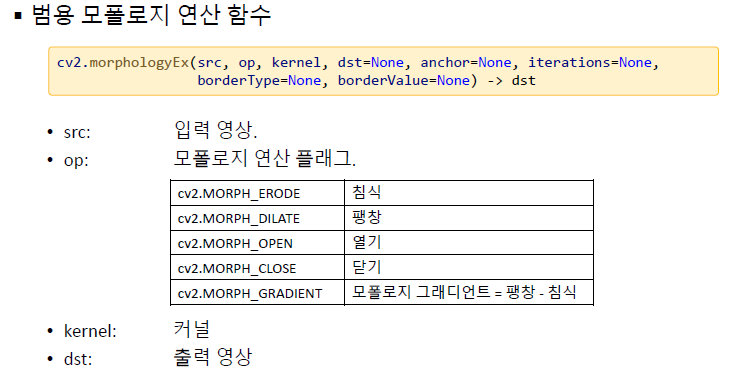

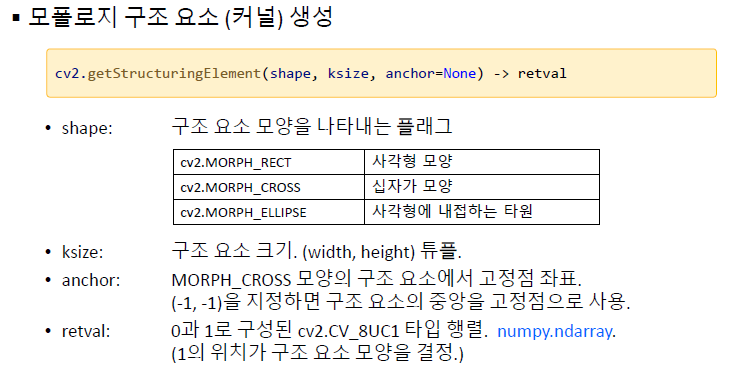

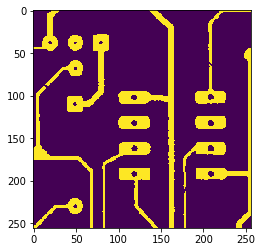

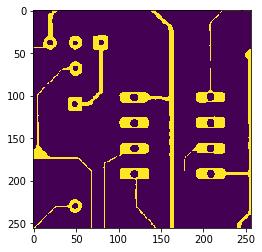

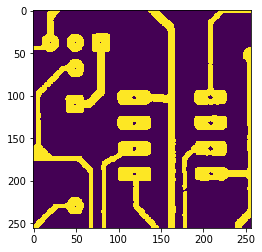

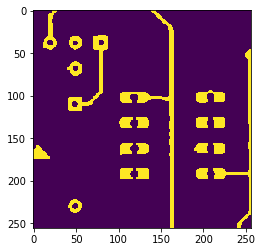

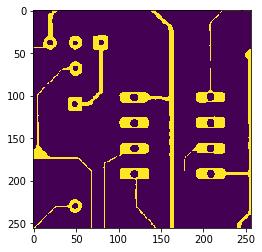

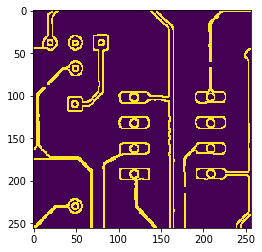

In [11]:
src = cv2.imread('circuit.bmp', cv2.IMREAD_GRAYSCALE)
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst1 = cv2.erode(src, se)
dst2 = cv2.dilate(src, None)
dst3 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, kernel)
dst4 = cv2.morphologyEx(dst1, cv2.MORPH_CLOSE, kernel)
dst5 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, kernel)

plt.imshow(src)
plt.show()
plt.imshow(dst1)
plt.show()
plt.imshow(dst2)
plt.show()
plt.imshow(dst3)
plt.show()
plt.imshow(dst4)
plt.show()
plt.imshow(dst5)
plt.show()

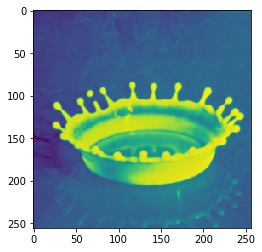

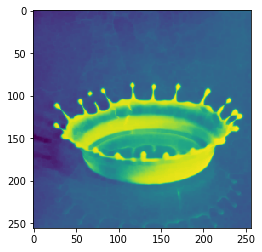

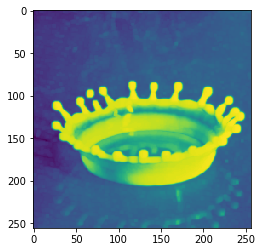

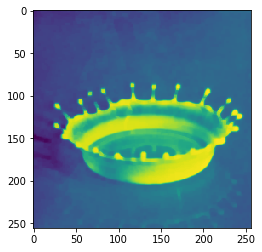

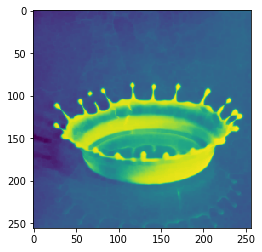

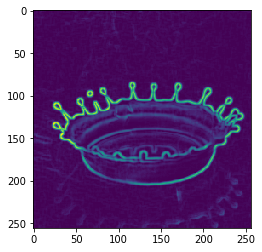

In [16]:
src = cv2.imread('milkdrop.bmp', cv2.IMREAD_GRAYSCALE)
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst1 = cv2.erode(src, se)
dst2 = cv2.dilate(src, None)
dst3 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, kernel)
dst4 = cv2.morphologyEx(dst1, cv2.MORPH_CLOSE, kernel)
dst5 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, kernel)

plt.imshow(src)
plt.show()
plt.imshow(dst1)
plt.show()
plt.imshow(dst2)
plt.show()
plt.imshow(dst3)
plt.show()
plt.imshow(dst4)
plt.show()
plt.imshow(dst5)
plt.show()

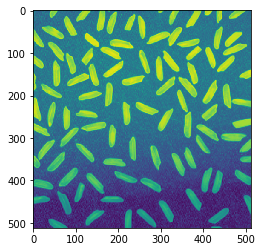

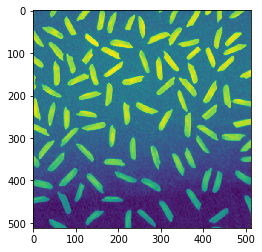

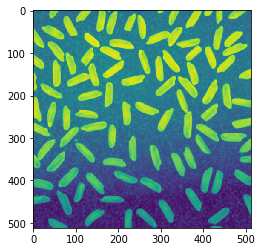

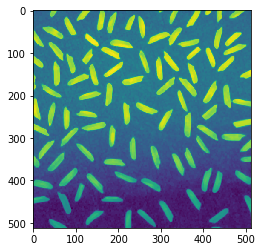

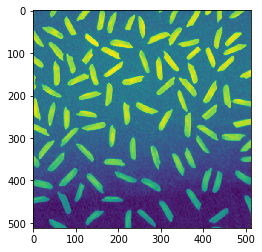

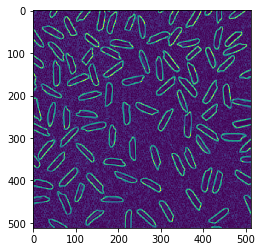

In [17]:
src = cv2.imread('rice.png', cv2.IMREAD_GRAYSCALE)
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
dst1 = cv2.erode(src, se)
dst2 = cv2.dilate(src, None)
dst3 = cv2.morphologyEx(dst1, cv2.MORPH_OPEN, kernel)
dst4 = cv2.morphologyEx(dst1, cv2.MORPH_CLOSE, kernel)
dst5 = cv2.morphologyEx(dst1, cv2.MORPH_GRADIENT, kernel)

plt.imshow(src)
plt.show()
plt.imshow(dst1)
plt.show()
plt.imshow(dst2)
plt.show()
plt.imshow(dst3)
plt.show()
plt.imshow(dst4)
plt.show()
plt.imshow(dst5)
plt.show()

# 레이블링 (labeling)

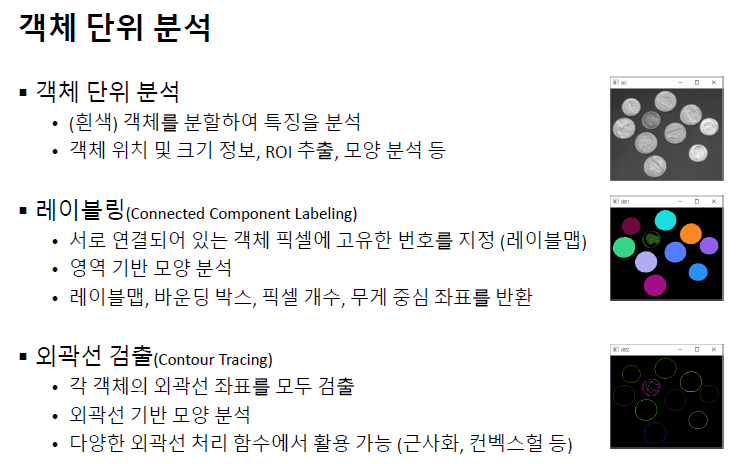

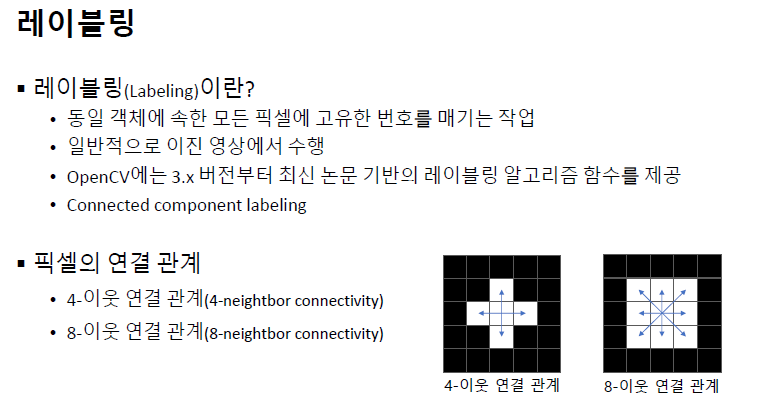

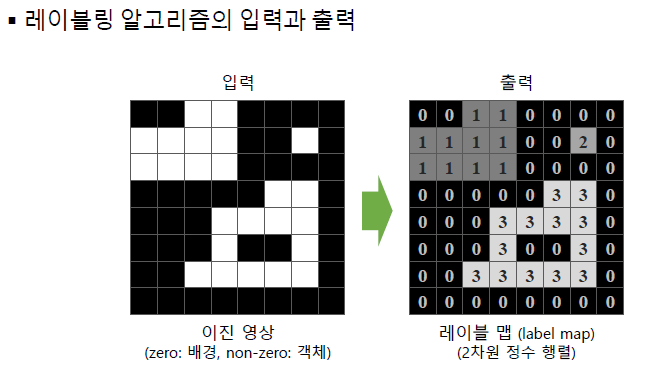

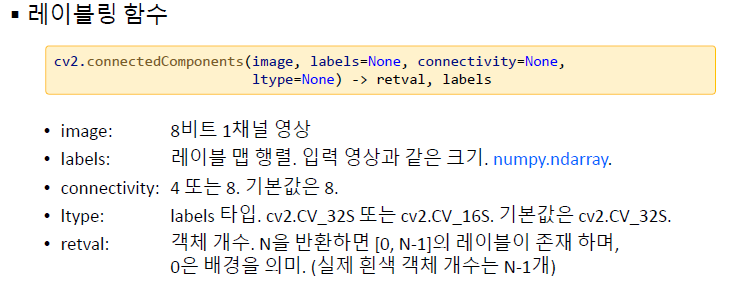

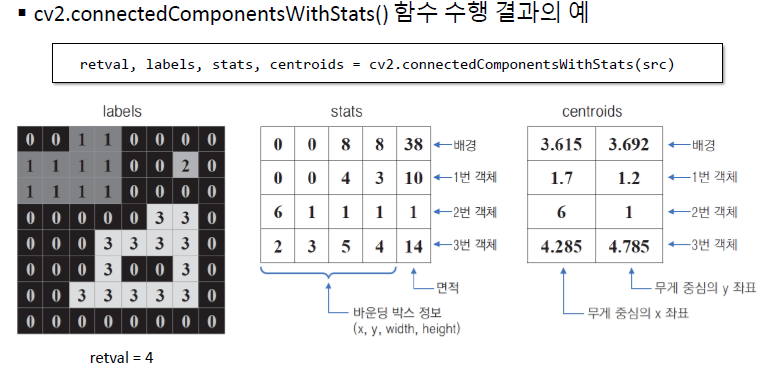

(512, 512) 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
38
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[     0      0    512    512 256750]
 [   102     30     23     29    341]
 [   276     32     23     27    259]
 [   451     36      9     36    168]
 [   278     45      1      1      1]
 [   102     95     21     33    230]
 [   274     97     21     34    373]
 [   445     99     21     34    366]
 [   387    149      1      1      1]
 [    16    198     34     38    350]
 [   189    200     29     38    452]
 [   370    201      8     38    221]
 [   197    253      1      1      1]
 [   271    258     14     40    245]
 [   441    260     14     40    239]
 [    78    272     36     25    313]
 [   135    310      1      1      1]
 [   302    312      1      1      1]
 [   470    314      1      2      2]
 [   121    320      1

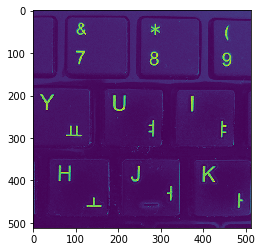

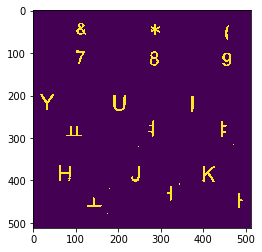

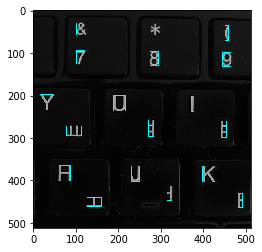

In [24]:
## 라벨링 적용해보기

import sys
import numpy as np
import cv2


src = cv2.imread('keyboard.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_OTSU)
print(src_bin.shape,'\n', src_bin)

cnt, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)

print(cnt, labels, stats, centroids, sep ='\n')


dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for i in range(1, cnt):
    (x, y, w, h, area) = stats[i]   ## stats 정보 활용

    if area < 20:   ## 면적이 20이 넘지않으면 무시 
        continue

    cv2.rectangle(dst, (x, y, w, h), (0, 255, 255))

plt.imshow(src)
plt.show()
plt.imshow(src_bin)
plt.show()
plt.imshow(dst)
plt.show()


cv2.imshow('src', src)
cv2.imshow('src_bin', src_bin)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


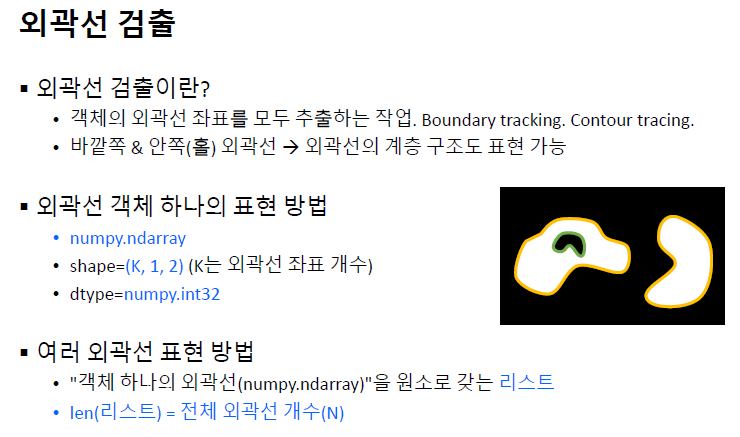


# =>

윤곽선(컨투어)를 검출하는 주된 요소는 하얀색의 객체를 검출한다.

그러므로 배경은 검은색이며 검출하려는 물체는 하얀색의 성질을 띄게끔 변형이 필요

이진화 처리 후, 반전시켜 검출하려는 물체를 하얀색의 성질을 띄도록 변환.

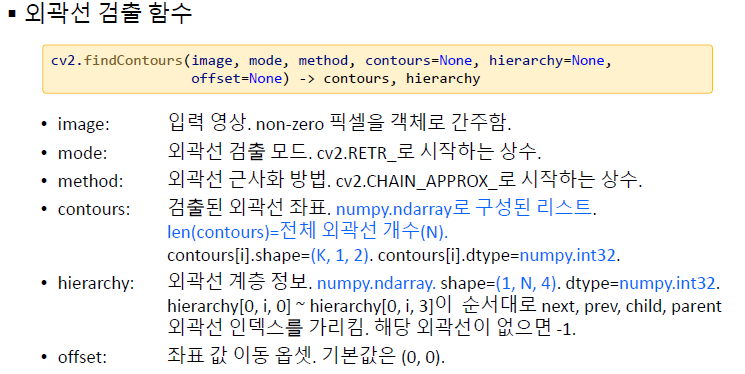

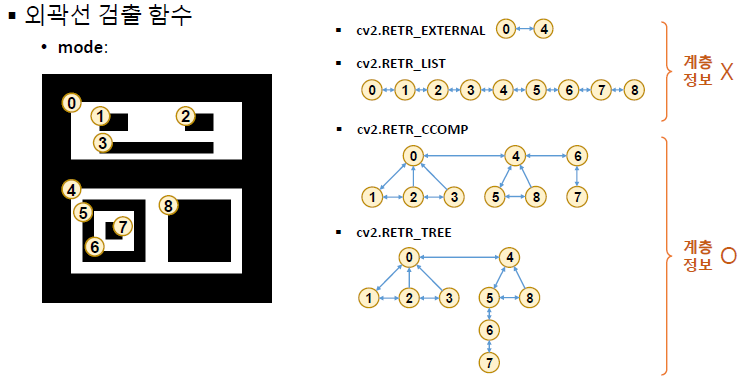

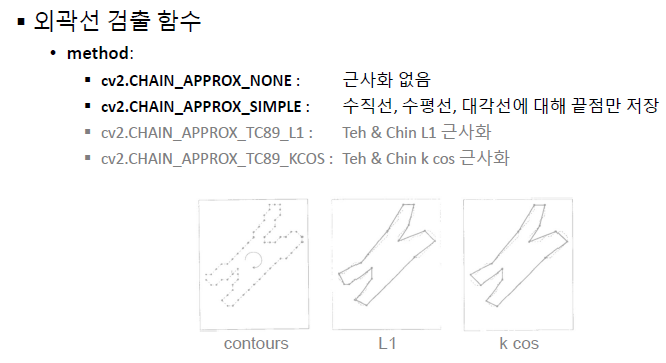

9

(276, 1, 2)

[[[ 90 240]]

 [[ 90 241]]

 [[ 90 242]]

 [[ 90 243]]

 [[ 90 244]]

 [[ 90 245]]

 [[ 90 246]]

 [[ 90 247]]

 [[ 90 248]]

 [[ 90 249]]

 [[ 90 250]]

 [[ 90 251]]

 [[ 90 252]]

 [[ 90 253]]

 [[ 90 254]]

 [[ 90 255]]

 [[ 90 256]]

 [[ 90 257]]

 [[ 90 258]]

 [[ 90 259]]

 [[ 90 260]]

 [[ 90 261]]

 [[ 90 262]]

 [[ 90 263]]

 [[ 90 264]]

 [[ 90 265]]

 [[ 90 266]]

 [[ 90 267]]

 [[ 90 268]]

 [[ 90 269]]

 [[ 90 270]]

 [[ 90 271]]

 [[ 90 272]]

 [[ 90 273]]

 [[ 90 274]]

 [[ 90 275]]

 [[ 90 276]]

 [[ 90 277]]

 [[ 90 278]]

 [[ 90 279]]

 [[ 90 280]]

 [[ 90 281]]

 [[ 90 282]]

 [[ 90 283]]

 [[ 90 284]]

 [[ 90 285]]

 [[ 90 286]]

 [[ 90 287]]

 [[ 90 288]]

 [[ 90 289]]

 [[ 90 290]]

 [[ 90 291]]

 [[ 90 292]]

 [[ 90 293]]

 [[ 90 294]]

 [[ 90 295]]

 [[ 90 296]]

 [[ 90 297]]

 [[ 90 298]]

 [[ 90 299]]

 [[ 90 300]]

 [[ 90 301]]

 [[ 90 302]]

 [[ 90 303]]

 [[ 90 304]]

 [[ 90 305]]

 [[ 90 306]]

 [[ 90 307]]

 [[ 90 308]]

 [[ 90 309]]

 [[ 

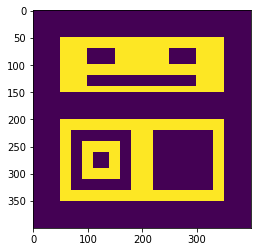

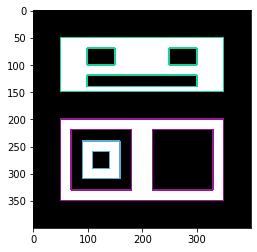

In [32]:
import sys
import random
import numpy as np
import cv2


src = cv2.imread('contours.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

contours, hier = cv2.findContours(src, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
print(len(contours), contours[0].shape, contours[0] , contours, sep='\n\n')  
## 출력 : 9, (276,1,2) ,  3차원 행렬,  tuple of 3차원 행렬 (객체별로 3차원 행렬 저장)

print(hier)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

idx = 0
while idx >= 0:
    c = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    cv2.drawContours(dst, contours, idx, c, 2, cv2.LINE_8, hier)
    idx = hier[0, idx, 0]

    
plt.imshow(src)
plt.show()

plt.imshow(dst)
plt.show()


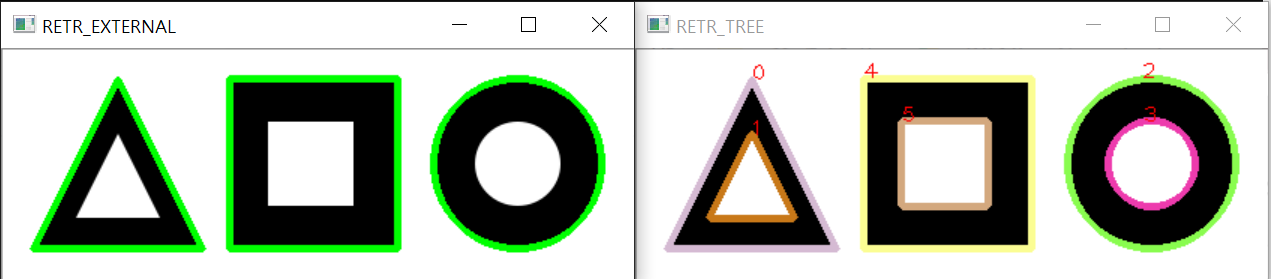

위 그림에 대해 cv2.findContours를 했을때의 hierarchy 결과

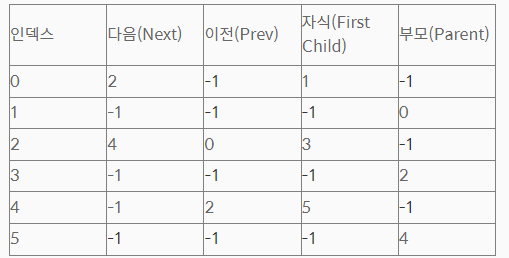

요소 값 중 -1은 의미 없음을 나타냅니다. 우선, 0번째 행을 보겠습니다. 0번째 행은 첫 번째 도형의 컨투어를 의미합니다. 이는 위 두 번째 그림에서 왼쪽의 삼각형 외곽을 뜻합니다. 0번째 행의 Next, Prev, First Child, Parent는 각각 2, -1, 1, -1입니다. Prev와 Parent는 -1이므로 아무 의미가 없다는 뜻입니다. 즉, 삼각형 외곽 컨투어의 기준에는 이전 도형이 없고, 부모 도형도 없다는 뜻입니다. 그러나 Next와 First Child는 각 2와 1입니다. 이 말은 다음 도형은 2행이고, 자식은 1행이라는 것입니다. 2행인 4, 0 ,3 -1을 이루고 있는 컨투어는 맨 오른쪽 원 도형의 외곽입니다. 1행인 -1, -1, -1, 0은 왼쪽 삼각형의 내부 컨투어입니다. 자연스럽게 내부 삼각형의 부모는 0입니다. 2행인 4, 0 ,3 -1을 이루고 있는 컨투어의 다음 도형은 4행인 사각형 외곽이고, 이전은 0행인 삼각형 외곽이며, 자식은 3행인 원 내부입니다. 이런 식으로 컨투어 계층 정보(hierarchy)를 보면 외곽 요소와 자식 요소를 순회할 수 있습니다. 최외곽 컨투어만 골라내려면 부모 항목이 -1인 행만 찾으면 되고, 그것이 이 예제에서는 도형의 개수와 같습니다.

# 다양한 외곽함수 함수  : pdf 자료 참조하자

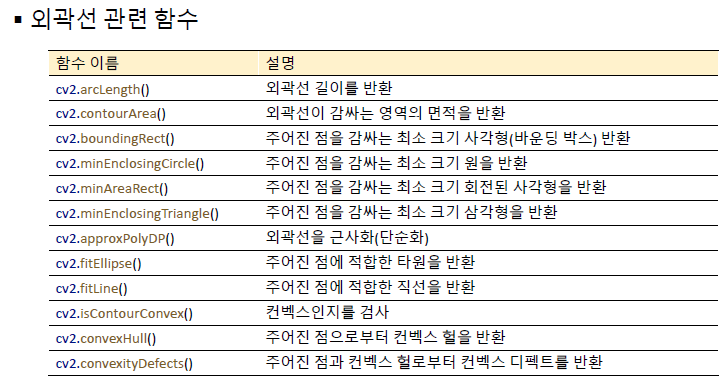

In [34]:
import math
import cv2


def setLabel(img, pts, label):
    # 바운딩 박스(외곽선을 외접하여 둘러싸는 사각형)를 구하는 함수
    (x, y, w, h) = cv2.boundingRect(pts)
    pt1 = (x, y)
    pt2 = (x + w, y + h)
    cv2.rectangle(img, pt1, pt2, (0, 0, 255), 1)
    cv2.putText(img, label, pt1, cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255))


def main():
    img = cv2.imread('polygon.bmp', cv2.IMREAD_COLOR)

    if img is None:
        print('Image load failed!')
        return

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img_bin = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(img_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    for pts in contours:  # contours는 tuple of 3차원 배열, pts.shape = (K, 1 ,2)
        
        # cv2.contourArea(외곽선 좌표) : 면적 구하는 함수
        if cv2.contourArea(pts) < 400:  #  너무 작으면 무시
            continue
        
        # 외곽선을 근사화(회귀분석화)하는 함수 
        approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

        vtc = len(approx)

        if vtc == 3:             # 삼각형
            setLabel(img, pts, 'TRI')
        elif vtc == 4:           # 사각형
            setLabel(img, pts, 'RECT')
        elif vtc == 5:           # 오각형
            setLabel(img, pts, 'FIVE')    
        else:
            length = cv2.arcLength(pts, True)
            area = cv2.contourArea(pts)
            
            # 정해진 외곽선 길이에 대한 넓이 비율이 가장 큰 형태가 원 (면적 대비 외곽석 길이의 비율로 원 판별)
            ratio = 4. * math.pi * area / (length * length)  

            if ratio > 0.85:     # 원
                setLabel(img, pts, 'CIR')

    cv2.imshow('img', img)
    cv2.waitKey()
    cv2.destroyAllWindows()


if __name__ == '__main__':
    main()


In [ ]:
"""
Tesseract-ocr 설치하기

1. tesseract-ocr-w64-setup-v5.0.0-alpha.20200328 파일 다운로드 
   (https://digi.bib.uni-mannheim.de/tesseract/tesseract-ocr-w64-setup-v5.0.0-alpha.20200328.exe)
2. 설치 시 "Additional script data" 항목에서 "Hangul Script", "Hangul vertical script" 항목 체크,
   "Additional language data" 항목에서 "Korean" 항목 체크.
4. 설치 후 시스템 환경변수 PATH에 Tesseract 설치 폴더 추가
   (e.g.) c:\Program Files\Tesseract-OCR
4. 설치 후 시스템 환경변수에 TESSDATA_PREFIX를 추가하고, 변수 값을 <Tesseract-DIR>\tessdata 로 설정
5. <Tesseract-DIR>\tessdata\script\ 폴더에 있는 Hangul.traineddata, Hangul_vert.traineddata 파일을
   <Tesseract-DIR>\tessdata\ 폴더로 복사
6. 명령 프롬프트 창에서 pip install pytesseract 명령 입력
"""

import sys
import random
import numpy as np
import cv2
import pytesseract


def reorderPts(pts):
    idx = np.lexsort((pts[:, 1], pts[:, 0]))  # 칼럼0 -> 칼럼1 순으로 정렬한 인덱스를 반환
    pts = pts[idx]  # x좌표로 정렬

    if pts[0, 1] > pts[1, 1]:
        pts[[0, 1]] = pts[[1, 0]]

    if pts[2, 1] < pts[3, 1]:
        pts[[2, 3]] = pts[[3, 2]]

    return pts


# 영상 불러오기
filename = 'namecard1.jpg'
if len(sys.argv) > 1:
    filename = sys.argv[1]

src = cv2.imread(filename)

if src is None:
    print('Image load failed!')
    sys.exit()

# 출력 영상 설정
dw, dh = 720, 400
srcQuad = np.array([[0, 0], [0, 0], [0, 0], [0, 0]], np.float32)
dstQuad = np.array([[0, 0], [0, dh], [dw, dh], [dw, 0]], np.float32)
dst = np.zeros((dh, dw), np.uint8)

# 입력 영상 전처리
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
_, src_bin = cv2.threshold(src_gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 외곽선 검출 및 명함 검출
contours, _ = cv2.findContours(src_bin, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cpy = src.copy()
for pts in contours:
    # 너무 작은 객체는 무시
    if cv2.contourArea(pts) < 1000:
        continue

    # 외곽선 근사화
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True)*0.02, True)

    # 컨벡스가 아니고, 사각형이 아니면 무시
    if not cv2.isContourConvex(approx) or len(approx) != 4:
        continue

    cv2.polylines(cpy, [approx], True, (0, 255, 0), 2, cv2.LINE_AA)
    srcQuad = reorderPts(approx.reshape(4, 2).astype(np.float32))

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (dw, dh))

dst_gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
print(pytesseract.image_to_string(dst_gray, lang='Hangul+eng'))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
